# **AirBnb Booking Analysis**    -



##### **Project Type**    - EDA
##### **Contribution**    - Team
#####                       Team Member 1 - Yash Kumar
#####                       Team Member 2 - Taniya Yadav

# **Project Summary -**

Write the summary here within 500-600 words.
* Airbnb is considered to be an online marketplace where people are able to connect with each other as the people who want to rent out their property looks for people who are looking for accomodation in specific areas.
* Goal of the project - The goal of the project is to gather information and analyse the detailed information of the different airbnbs the neighbourhoods groups in order to provide insights about the airbnbs in a particular area as per your preference , type of rooms and price accordingly.




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries and connect Google Drive

In [1]:
# Import Libraries
import pandas as pd                   #Importing Pandas library
import numpy as np                    #Importing Numpy library
import matplotlib.pyplot as plt       #Importing Matplot library
import seaborn as sns                 #Importing Seaborn library
from datetime import datetime as dt   #Importing Datetime Module library
import missingno as msno              #Importing missingno library to visualize Nan Values

In [2]:
from google.colab import drive    #Mounying the google drive to the colab
drive .mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
bnb_df=pd.read_csv('/content/drive/MyDrive/Project_EDA/Dataset/Copy of Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
bnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
bnb_df.shape

(48895, 16)

### Dataset Information

In [6]:
# Dataset Info
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
bnb_df[bnb_df.duplicated()].sum() #After seeing the output we can tell there is no duplicate rows are present

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

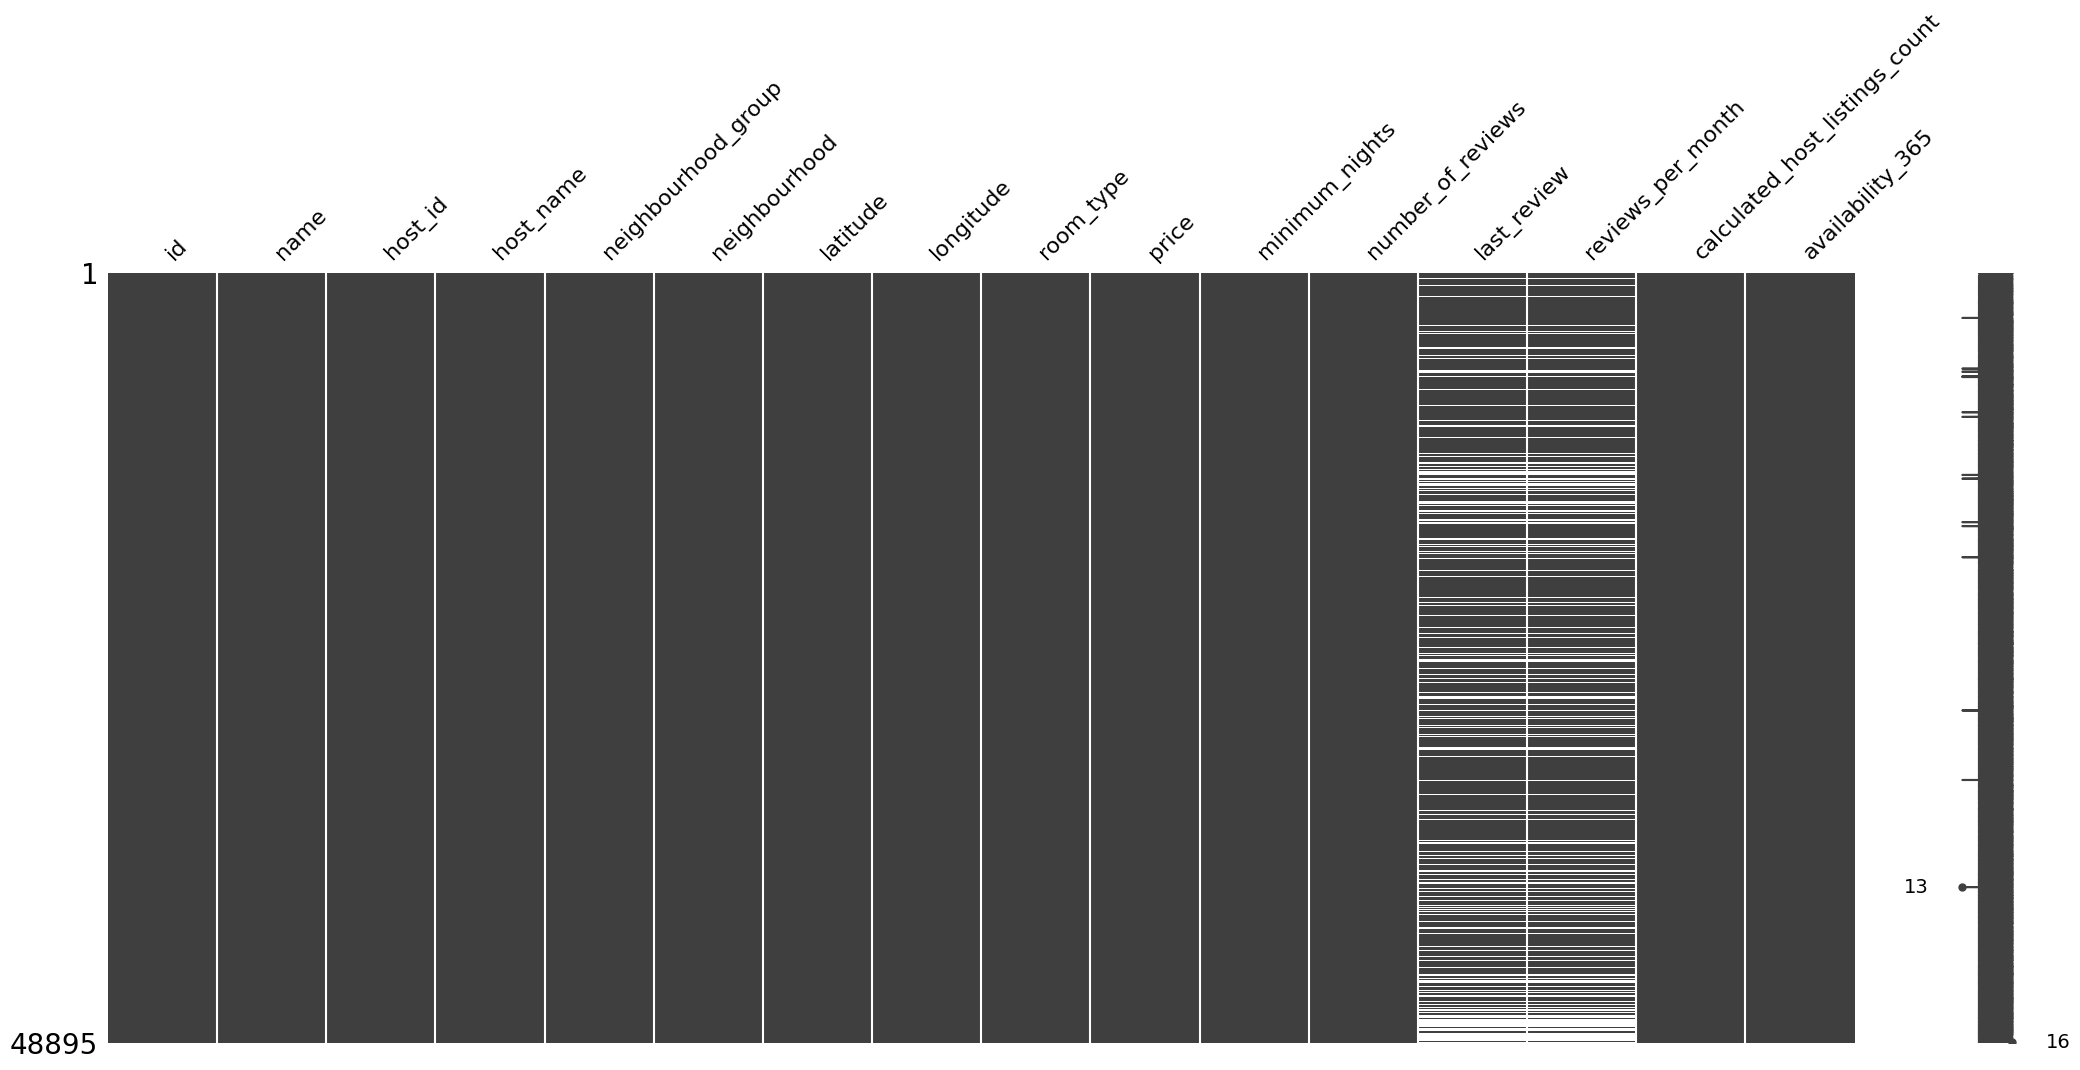

In [9]:
# Visualizing the missing values
msno.matrix(bnb_df)

### What did you know about your dataset?
* As per the above information, we can see the coloumns host_name , neighbourhood_group, neighbourhood, room_type,reviews_per_month are all of object type. Others are either int or float type .

**The following are the counts for null values:**

* name - 16
* host_name - 21
* last_review - 10052
* reviews_per_month - 10052

**The following columns are listed in the DataFrame-**
  * 1. id - ID of the person who booked the airbnb
  * 2. name -  Name of the person who booked for accomodation
  * 3. host_id - ID of the person who rents out the property
  * 4. host_name - Name of the person who rents out their property
  * 5. neighbourhood_group- It indicates the region which includes
       several small neighbourhood(i.e. like a broader group having smaller units of neighbourhood)
  * 6. neighbourhood - It indicates geogrphically smaller area
      within a city or region having their own local identity and charatersitics
  * 7. latitude	- Shows the measurement of distance from north or south pole of
       an equator of that particular property
  * 8. longitude - Shows the measurement of distance from east or west prime
       meridian of that particular property
  * 9. room_type - Indicates the type of the room i.e. private room , Entire
       home/apt,or shared room  
  * 10. price - This indicates the value at which the property is rented in
        bucks.
  * 11. minimum_nights - This shows minimum nights offered with package
        (i.e. a person can't book for less than this set number of nights)
  * 12.	number_of_reviews - This indicates the number of reviews recieved by  a
        particular property.
  * 13. last_review - Shows the last date of the review given
  * 14.	reviews_per_month - indicates the number of review given in particular
        month
  * 15.	calculated_host_listings_count- It shows the count of amount of listing
        per host.
  * 16. availability_365 - Indicates for how many days the    airbnb     is
        available in a year


Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
bnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
bnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

**The following columns are listed in the DataFrame-**
  * 1. id - ID of the person who booked the airbnb
  * 2. name -  Name of th person who booked for accomodation
  * 3. host_id - ID of the person who rents out the property
  * 4. host_name - Name of the person who rents out their property
  * 5. neighbourhood_group- It indicates the region which includes
       several small neighbourhood(i.e. like a broader group having smaller units of neighbourhood)
  * 6. neighbourhood - It indicates geogrphically smaller area
      within a city or region having their own local identity and charatersitics
  * 7. latitude	- Shows the latitude of the Airbnb
  * 8. longitude - Shows the longitude of the Airbnb
  * 9. room_type - Indicates the type of th room i.e. private   
       room , Entire home/apt,or shared room  
  * 10.  price - This indicates the value at which the airbnb is
         rented in bucks
  * 11. minimum_nights - This shows minimum nights offered with
        package (i.e. a person can't book for less than this set number of nights)
  * 12.	number_of_reviews - This indicates the number of reviews
        recieved by  a particular airbnb
  * 13. last_review - Shows the last date of the review given
  * 14.	reviews_per_month - indicates the number of review given  
        in a particular month
  * 15.	calculated_host_listings_count-
  * 16. availability_365 - Indicates for how many days the    airbnb     is available in a year

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
def unique_values_count(x):
  di={}
  for i in bnb_df.columns:
    cv=bnb_df[i].unique()
    di[i]=len(cv)
  return di[x]
col_name_u=input("Enter column name: ").lower()
print(unique_values_count(col_name_u))

Enter column name: room_type
3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

In [14]:
# Drop the unwanted columns and NaN values
bnb_df.drop(['last_review','reviews_per_month'],axis=1,inplace=True)
bnb_df.dropna(inplace=True)

In [15]:
#Check for null values after cleaning
bnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
# Dataset Info and check how many entries are there left after cleaning the data
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  calculated_host_listings_count  

In [17]:
bnb_df.shape

(48858, 14)

In [18]:
def unique_item(x):
  return bnb_df[x].unique()
col_name=input("Enter the column name: ").lower()
print(np.sort(unique_item(col_name)))

Enter the column name: host_name
["'Cil" '(Ari) HENRY LEE' '(Email hidden by Airbnb)' ... '소정' '진' '현선']


In [19]:
wr_name=list(np.sort(unique_item(col_name))[-1:-57:-1])

In [20]:
new_name=['current Line','genuine','predetermined','binna',"danby","Xinhui","Vedic","Qingming","Yuli", "spicy","poetry moon","Ying","virtue","Shino","Auspicious Yin","astute","Zeyu","Masakawa","Penangli","Berun","Ming Feng","Wen Jing","Quiet","Wen Li","Wen Qing","Si Quan","Peter","Ivy","Steep","Sun Hao","power","Yizhu","ZheWei","Chenggang","Curly Ni","Ran Yang","approve","good","seven","Yuria & Fredy","The Local Apple"," Valéria","Daniel","Julia","Тest"
,"Sergey","Oksana","Zina","Vil","Anita","Andrey","Alexei","Alexandrina","A pattern","İlyas","Story","Elodie"]
cr_name=dict(zip(wr_name,new_name))

In [21]:
def rename_host(x):
  bnb_df['host_name']=bnb_df['host_name'].replace(x)
  return None
rename_host(cr_name)

Enter col name: price


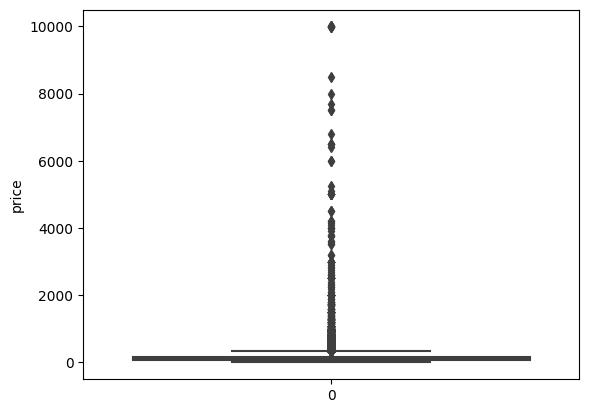

None


In [22]:
def outlier_plot(x):
  sns.boxplot(bnb_df[x])
  plt.ylabel(x)
  return plt.show()
col=input("Enter col name: ").lower()
print(outlier_plot(col))

In [23]:
# Removing Outliers from minimum_nights columns as we can see in box plot
bnb_df.drop(bnb_df[bnb_df['minimum_nights']>=600].index,inplace=True)

In [24]:
# We have price is 0 for some entries so we have to encounter it
mode_ds=bnb_df['price'].mode()
bnb_df['price'].replace(to_replace=0,value=mode_ds[0],inplace=True)

In [25]:
# We have availability_365 as 0 for many entries so we have to handle it
mean_ds=bnb_df['availability_365'].mean()
bnb_df['availability_365'].replace(to_replace=0,value=round(mean_ds),inplace=True)

### What all manipulations have you done and insights you found?

* The columns last_review and reviews_per_month has larhe number of null values which contributes a lot to the data and from analysis point of view these coulumns are of no significance so these coulmns are droppped.
* The rows of the columns name and host_name has null values and as it is too small to be taken into consideration and hence dropped.




 **The following actions were taken in the above codes**
 **Initially using the box plot tried to plot every columns to infer which columns outliers may cause problem for analysis and hence came into conclusion *
 * Handled the Outliers from minimum_nights columns.
 * Handled the invalid value of the price column i.e. 0 , by replacing it with the mode
 * Handled the invalid value of availability_365 coloumn i.e. 0 by replacing it with the mean  

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'No. Of Properties of a particular room type')

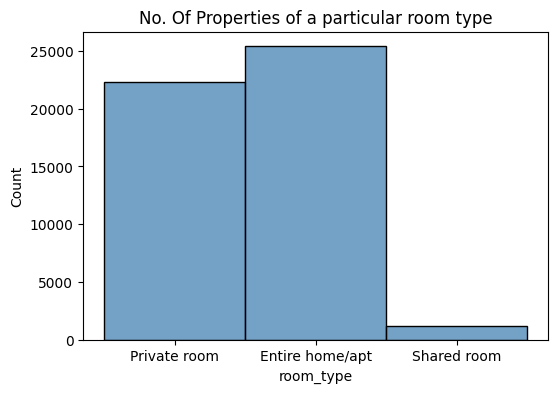

In [26]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
chart1=sns.histplot(data=bnb_df,x='room_type',color='Steelblue',edgecolor='black')
chart1.grid(False)
chart1.spines['top'].set_color('black')
chart1.spines['right'].set_color('black')
chart1.spines['bottom'].set_color('black')
chart1.spines['left'].set_color('black')
plt.title("No. Of Properties of a particular room type")

##### 1. Why did you pick the specific chart?

*This particular graph was*

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0.5, 1.0, 'No. Of Properties in a particular neighbourhood group')

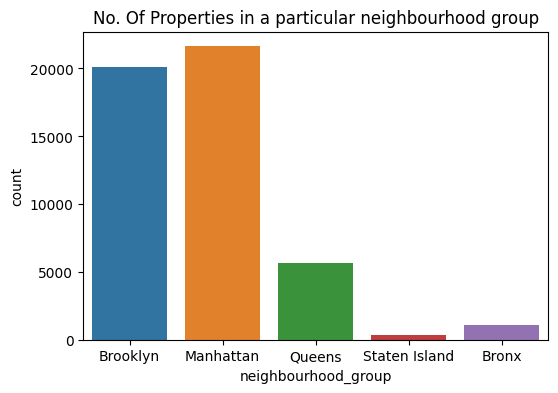

In [27]:
# Chart - 2 visualization code
plt.figure(figsize=(6, 4))
chart2=sns.countplot(data=bnb_df,x='neighbourhood_group')
chart2.grid(False)
chart2.spines['top'].set_color('black')
chart2.spines['right'].set_color('black')
chart2.spines['bottom'].set_color('black')
chart2.spines['left'].set_color('black')
plt.title("No. Of Properties in a particular neighbourhood group")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Density of properties listed according to minimum nights')

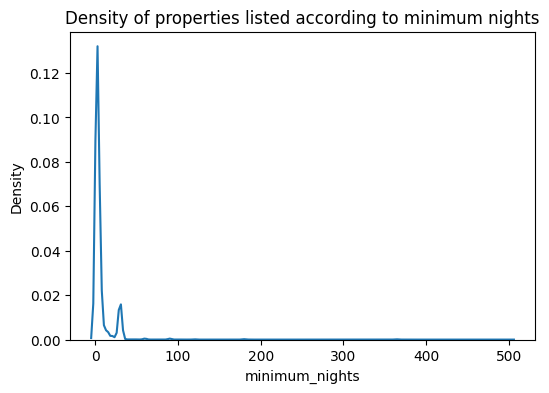

In [28]:
# Chart - 3 visualization code
plt.figure(figsize=(6, 4))
chart3=sns.kdeplot(bnb_df["minimum_nights"])
plt.title("Density of properties listed according to minimum nights")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

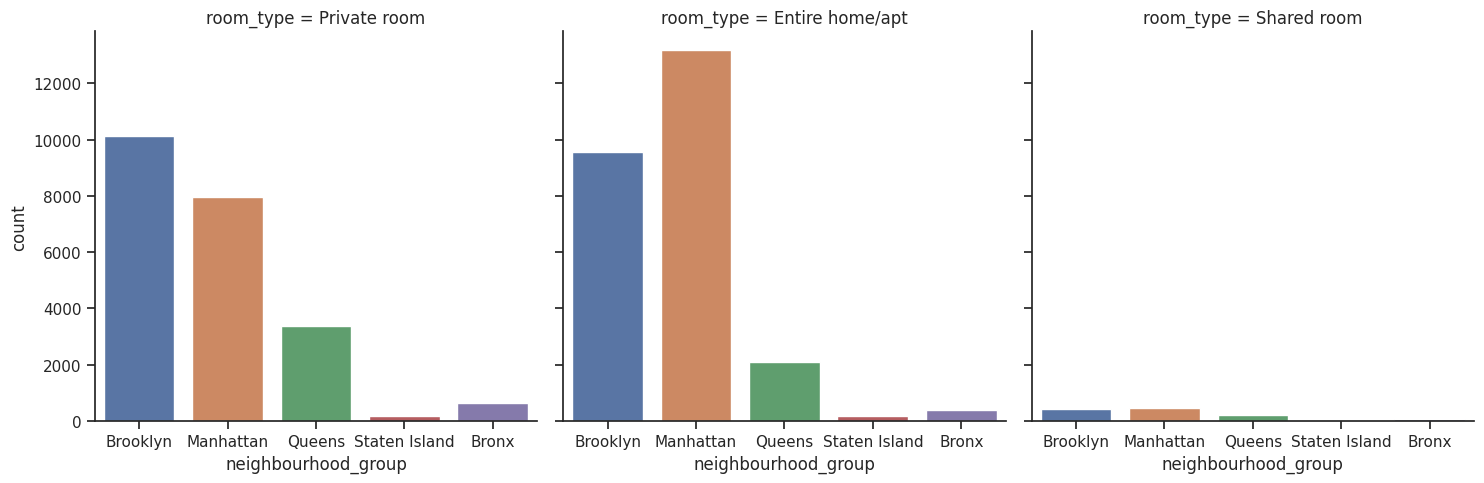

In [29]:
# Chart - 4 visualization code
sns.set(style="ticks", rc={"axes.grid": False})
chart4=sns.catplot(data=bnb_df,x='neighbourhood_group',kind='count',col='room_type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [30]:
# Chart - 5 visualization code
b=(bnb_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].sum()).sort_values(ascending=False).head().to_dict()
host_n=[]
for i in b.keys():
  host_n.append(i[1])

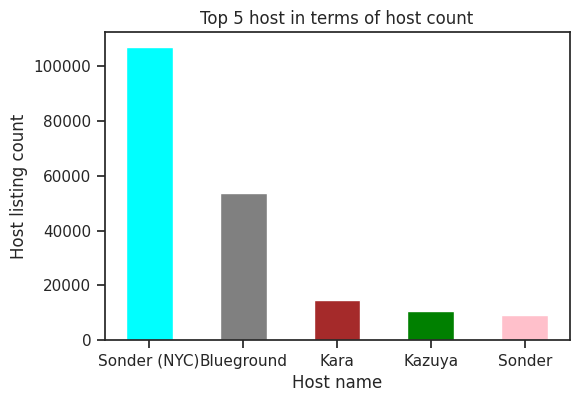

In [31]:
plt.figure(figsize=(6, 4))
plt.bar(host_n,b.values(),width=0.5,color=['cyan','grey','brown','green','pink'])
plt.xlabel("Host name")
plt.ylabel("Host listing count")
plt.title("Top 5 host in terms of host count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

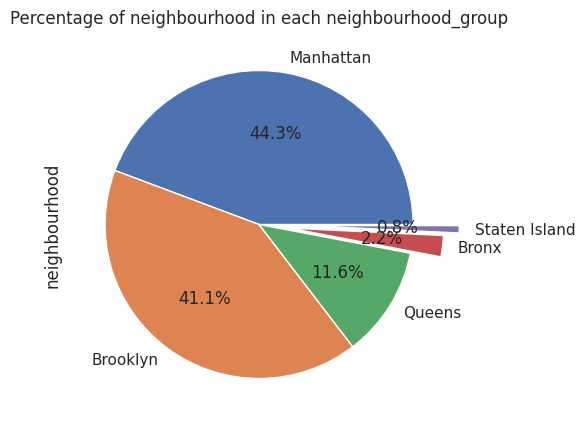

In [32]:
# Chart - 6 visualization code
chart6=(bnb_df.groupby('neighbourhood_group')['neighbourhood'].count()).sort_values(ascending=False)
chart6.plot(kind='pie',autopct='%1.1f%%',explode = [0, 0, 0, 0.2,0.3],figsize=(10,5))
plt.title("Percentage of neighbourhood in each neighbourhood_group")
sns.set_palette('tab20')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

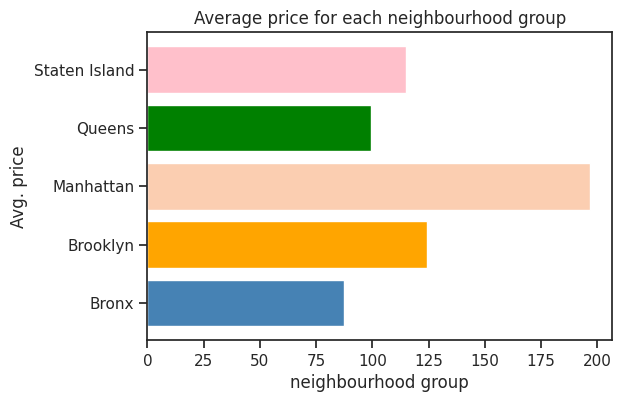

In [33]:
# Chart - 7 visualization code
chart7=round(bnb_df.groupby('neighbourhood_group')['price'].mean(),1).to_dict()
plt.figure(figsize=(6, 4))
plt.barh(list(chart7.keys()),list(chart7.values()),color=['steelblue','orange','#fbceb1','green','pink'])
plt.xlabel("neighbourhood group")
plt.ylabel("Avg. price")
plt.title("Average price for each neighbourhood group")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

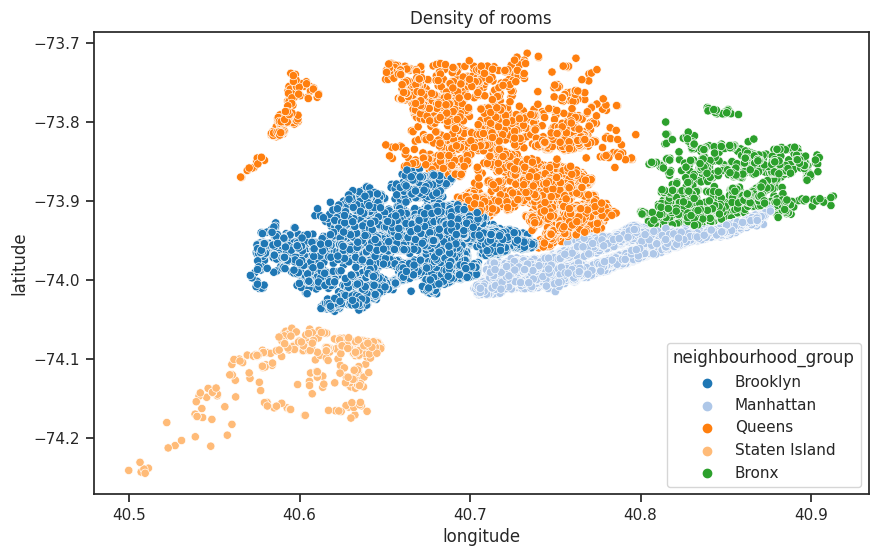

In [34]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
chart8=sns.scatterplot(data=bnb_df,x='latitude',y='longitude',hue='neighbourhood_group')
chart8.set_title('Density of rooms')
chart8.set_ylabel('latitude')
chart8.set_xlabel('longitude')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [35]:
# Chart - 9 visualization code
hk=bnb_df.groupby('neighbourhood_group')['neighbourhood'].value_counts()
uk=bnb_df.groupby('neighbourhood_group')['neighbourhood'].value_counts().groupby(level=0).idxmax().to_dict()
max_neighbourhood = hk.groupby(level=0).apply(lambda x: x.loc[x.idxmax()])
grp=uk.values()
ghx=dict(zip(grp,max_neighbourhood))

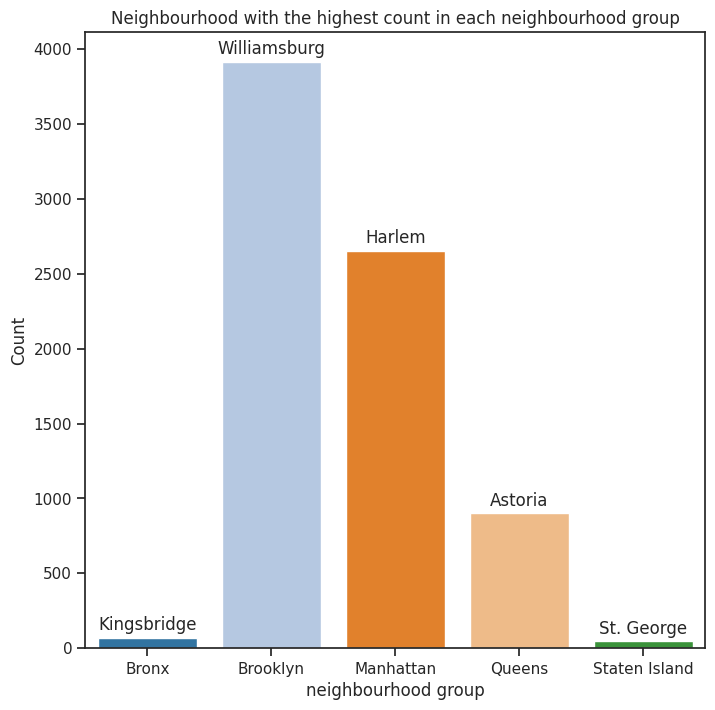

In [36]:
arty=list((ghx.keys()))
bnm=list(ghx.values())
jklp=[str(i[0]) for i in arty]
yui=[str(i[1]) for i in arty]
plt.figure(figsize=(8, 8))
axt=sns.barplot(x=jklp,y=bnm)
axt.grid(False)
for i, v in enumerate(bnm):
    axt.text(i, v + 50, yui[i], ha='center')
plt.xlabel('neighbourhood group')
plt.ylabel('Count')
plt.title('Neighbourhood with the highest count in each neighbourhood group')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

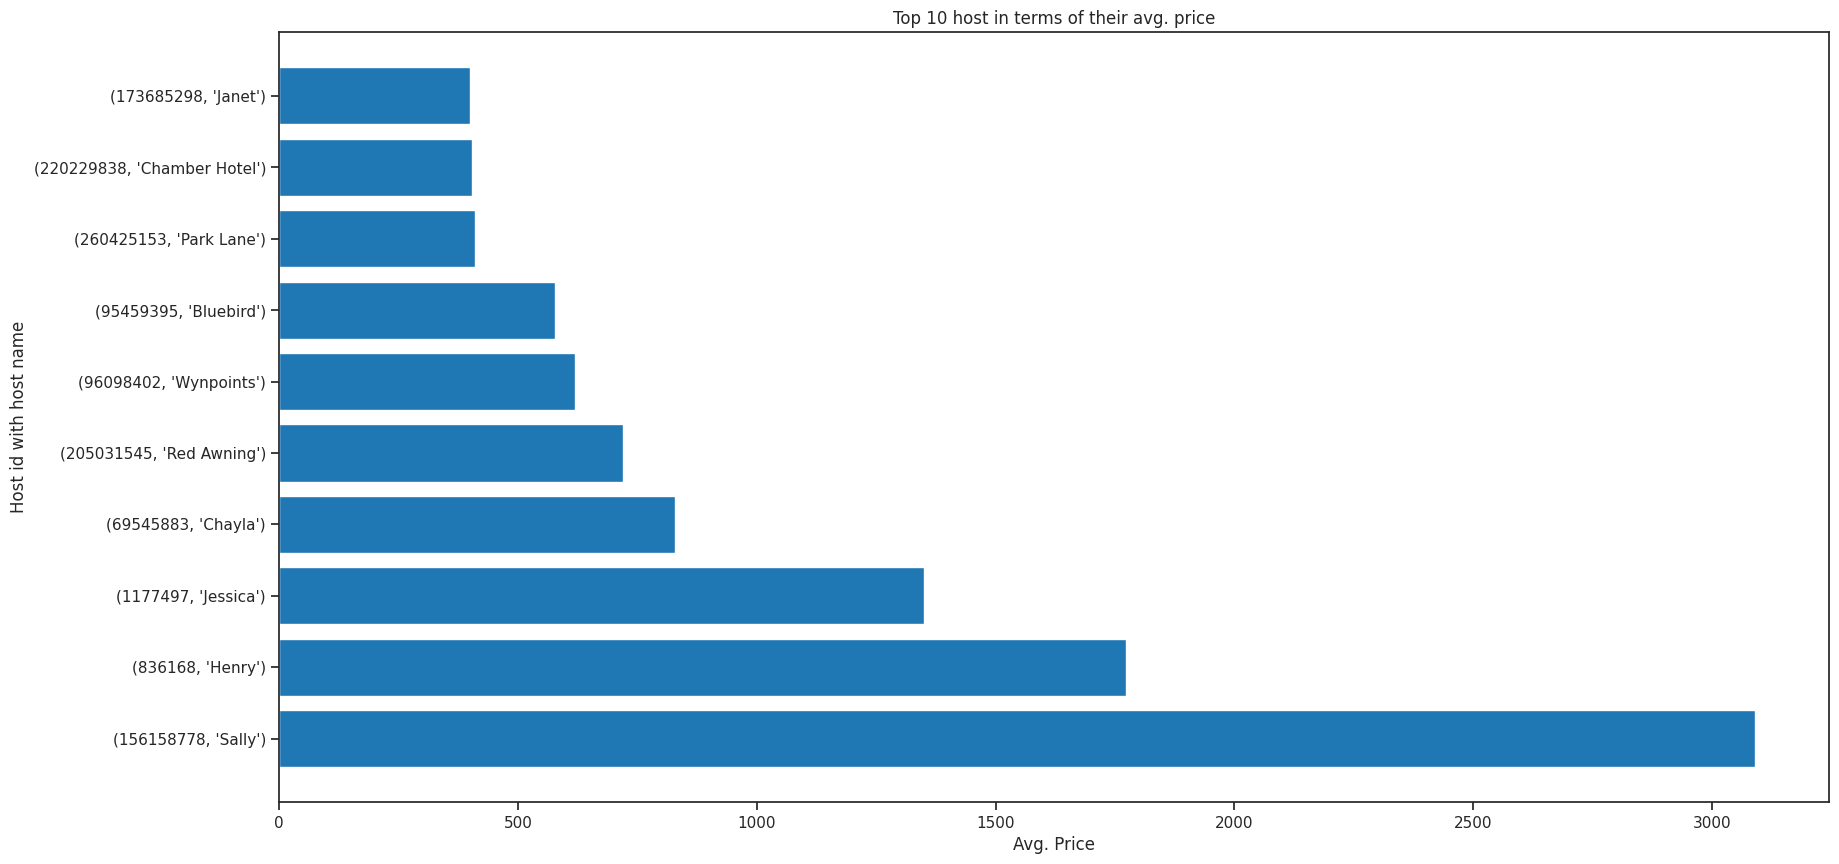

In [37]:
# Chart - 10 visualization code
chart10=(round(bnb_df.groupby(['host_id', 'host_name']).filter(lambda x: len(x) >= 10)
.groupby(['host_id','host_name'])['price'].mean(),2)
.sort_values(ascending =False).head(10).to_dict())
name1=[str(i) for i,j in chart10.items()]
price1=[j for i,j in chart10.items()]
plt.figure(figsize=(20, 10))
plt.barh(name1,price1)
plt.xlabel('Avg. Price')
plt.ylabel('Host id with host name')
plt.title('Top 10 host in terms of their avg. price')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [43]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [44]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [46]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [47]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***